# CIS 399 Homework 1: Machine Learning Basics and Overfitting

## Sophia Trump

In this homework, you will gain experience with basic tools for training and evaluating machine learning models. This assignment makes use of Python 3, as well as standard Python libraries for data science such as pandas, scikit-learn, and matplotlib. If this is your first time programming in Python, you may want to examine the language documentation (https://docs.python.org/3/), which includes some simple tutorials.

All cells where code is required are marked with a "YOUR CODE HERE" comment. The point values for each code block are written in the header for the associated subsection.



In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore') 

## Part 1: Loading Data

Pandas DataFrames are useful structures for working with data in Python. We can load our data from a CSV file directly into a DataFrame and display a sample of rows as output.

The data we are using for this homework is from the "Communities and Crime" dataset available from UC Irvine's Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/communities+and+crime). It includes data about the different types of crimes among various communities, socioeconomic and racial data about each community, and information about the police force in each community.

The last column indicates whether or not there is a high rate of violent crime in the community (1 if yes, 0 if no). This is the target (Y) variable for the dataset. Running the two cells below will display a subset of the entries as well as a list of the column names.

In [3]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("communities.csv")

dataframe.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.0
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00,1.0
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00,1.0
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00,0.0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [4]:
dataframe.columns.values.tolist()

['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEng

We can also extract the numerical values from a DataFrame into a Numpy array. Depending on the situation, these formats have various strengths and weaknesses. Numpy arrays are lightweight and behave much like a standard list, but do not support heterogenous data or many of the Pandas features for indexing and querying.

Below, we extract the values from our dataframe, display the dimensions of the array, and display a subset of the rows and columns. You should find that the values displayed match with the above dataframe output.

More information about array indexing in Numpy is available here: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

In [5]:
data = dataframe.values[:, :]

In [6]:
data.shape

(1994, 123)

In [7]:
data[0:5, 0:5]

array([[0.19, 0.33, 0.02, 0.9 , 0.12],
       [0.  , 0.16, 0.12, 0.74, 0.45],
       [0.  , 0.42, 0.49, 0.56, 0.17],
       [0.04, 0.77, 1.  , 0.08, 0.12],
       [0.01, 0.55, 0.02, 0.95, 0.09]])

### 1.1: Creating X and Y (5 Points)

Create arrays titled "X" and "y", where X consists of all but the last column of data (for all rows) and y is exclusively the last column. Print the shape of each array as accessed above.

In [8]:
X = dataframe.values[:, :-1]
y = dataframe.values[:, 122:123]

In [9]:
X.shape

(1994, 122)

In [10]:
print(X)

[[0.19 0.33 0.02 ... 0.5  0.32 0.14]
 [0.   0.16 0.12 ... 0.   0.   0.  ]
 [0.   0.42 0.49 ... 0.   0.   0.  ]
 ...
 [0.16 0.37 0.25 ... 0.   0.91 0.28]
 [0.08 0.51 0.06 ... 0.   0.22 0.18]
 [0.2  0.78 0.14 ... 0.5  1.   0.13]]


In [11]:
y.shape

(1994, 1)

In [11]:
print(y)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


### 1.2: Creating Train and Test Sets (5 points)

Create arrays titled: 
- X_train (first 1000 rows of X)
- X_test (remaining rows of X)
- y_train (first 1000 rows of y)
- y_test (remaining rows of y)

As the order of the records in the dataset are randomized, it is fine to simply use the beginning of the file as training and the rest as test.

For the y arrays, you may want to consider using the .ravel() method for "flattening" the array from 2 dimensions down to 1. Print the shape of each array.

In [12]:
X_train = X[0:1000, :]
X_test = X[1000:, :]
y_train = y[0:1000, :]
y_test = y[1000:, :]

y_train = y_train.ravel()
y_test = y_test.ravel()

In [13]:
X_train.shape

(1000, 122)

In [13]:
print(X_train)

[[0.19 0.33 0.02 ... 0.5  0.32 0.14]
 [0.   0.16 0.12 ... 0.   0.   0.  ]
 [0.   0.42 0.49 ... 0.   0.   0.  ]
 ...
 [0.   0.31 0.   ... 0.   0.   0.  ]
 [0.08 1.   0.46 ... 0.   0.   0.  ]
 [0.02 0.64 0.02 ... 0.   0.   0.  ]]


In [14]:
X_test.shape

(994, 122)

In [17]:
print(X_test)

[[0.08 0.45 0.01 ... 0.   0.   0.  ]
 [0.02 0.45 0.76 ... 0.   0.   0.  ]
 [0.07 0.24 0.06 ... 0.   0.   0.  ]
 ...
 [0.16 0.37 0.25 ... 0.   0.91 0.28]
 [0.08 0.51 0.06 ... 0.   0.22 0.18]
 [0.2  0.78 0.14 ... 0.5  1.   0.13]]


In [46]:
y_train.shape

(1000,)

In [15]:
print(y_train)

[0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.

In [47]:
y_test.shape

(994,)

In [16]:
print(y_test)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.

## Part 2: Training a Model

Scikit-learn features modules for a wide variety of machine learning algorithms, such as the ones we've been discussing in class. Read the documentation to understand how to train these models and generate predictions.
- Logistic Regression documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Decision Tree documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [18]:
from sklearn import linear_model, tree

dt = tree.DecisionTreeClassifier(max_depth=5)
logreg = linear_model.LogisticRegression()

### 2.1: Making Predictions with Decision Trees and Linear Regression (10 points)

Using your X_train and y_train arrays, train:
- a Decision Tree model
- a linear model via Logistic Regression (this may throw a DataConversionWarning which you can ignore)

Using x_test, generate "y_hat" predictions (one set of predictions with each model). Print the shape of each prediction array.

In [19]:
## Train the decision tree model ...
dt_trained = dt.fit(X_train, y_train, sample_weight=None, check_input=True, X_idx_sorted=None)

In [20]:
## Test the decision tree model ...
y_hat_dt = dt_trained.predict(X_test, check_input=True)

In [21]:
y_hat_dt.shape

(994,)

In [22]:
print(y_hat_dt)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.

In [23]:
## Train a linear model via Logistic Regression ...
logreg_trained = logreg.fit(X_train, y_train, sample_weight=None)

In [24]:
## Test the linear model via Logistic Regression ...
y_hat_logreg = logreg_trained.predict(X_test)

In [27]:
y_hat_logreg.shape

(994,)

In [28]:
print(y_hat_logreg)

[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

## Part 3: Evaluating a Model (5 points)

Write a function which takes in 2 binary arrays as arguments (i.e. y and y_hat) and computes the prediction error as a decimal between 0 and 1. Use this function to compute the errors for your Decision Tree and Logistic Regression models.

In [29]:
def error(y, y_hat):
    loss = 0
    
    ## check that parameters are correctly formatted
    if(not(len(y) == len(y_hat))):
        raise Exception("Unequal parameter lengths")
    
    for i in range(0, len(y)):
        if(not(y[i] == y_hat[i])):
            loss += 1
            
    return loss/len(y)

In [30]:
(error(y_test, y_hat_dt), error(y_test, y_hat_logreg))

(0.17303822937625754, 0.14989939637826963)

## Part 4: Visualizing Tradeoffs

### Using matplotlib

Matplotlib is a powerful library for graphing and data visualization in Python. Below we demonstrate some of its features in a generic plot:

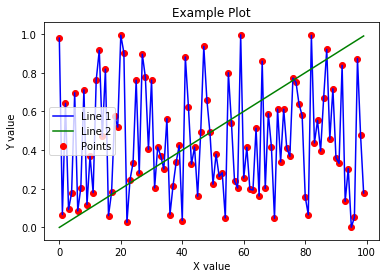

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import random

# Sample 100 random values from [0,1]
y1_example = np.array([random.random() for i in range(100)])
y2_example = np.array([i *0.01 for i in range(100)])
# Create an array with the indices
x_example = np.array(range(len(y1_example)))

# Create a plot with a caption, X and Y legends, etc
x_label = 'X value'
y_label = 'Y value'
plt.title('Example Plot')
plt.xlabel(x_label)
plt.ylabel(y_label)


plt.scatter(x_example, y1_example, color='red', label='Points')
plt.plot(x_example, y1_example, color='blue', label='Line 1')
plt.plot(x_example, y2_example, color='green', label='Line 2')
plt.legend()

plt.show()

### 4.1: Sample Size vs Generalization Error (10 points)

Write code which creates training sets of size $n \in \{10,20,...,990,1000\}$ by taking the first $n$ rows of X_train and y_train (give these different names from the original arrays). Train Decision Tree and Logistic Regression models with each of these training sets, generate out-of-sample predictions using X_test, and compute error using y_train as above.

Generate a matplotlib plot with "Sample Size" as the X-axis and "Test Error" as the Y-axis. Plot lines for both the Decision Tree and Logistic Regression results. Plot your lines in different colors and include a legend to specify which line belongs to which model class. 

__Disclaimer:__ The results you will see show that test error decreases quickly the number of samples in the dataset. Often, in practice, it takes tens of thousands of training samples to see a meaningful decrease in test error.

In [32]:
## find the error with Decision Tree

def DT_testErrorWithN(n, training_data, testing_data):
    ## take the first n rows of X_train and y_train
    trainX = training_data[0:n, :]
    trainY = y_train[0:n]
    
    ## train Decision Tree
    ## with each of these training sets
    dt = tree.DecisionTreeClassifier(max_depth=5)
    dt_train = dt.fit(trainX, trainY, sample_weight=None, check_input=True, X_idx_sorted=None)
    y_hat_dectree = dt_train.predict(testing_data, check_input=True)
    
    ## compute error
    return error(y_test, y_hat_dectree)

In [33]:
## find the error with Logistic Regression

def LR_testErrorWithN(n, training_data, testing_data):
    ## take the first n rows of X_train and y_train
    trainX = training_data[0:n, :]
    trainY = y_train[0:n]
    
    ## train Logistic Regression model
    ## with each of these training sets
    logreg = linear_model.LogisticRegression()
    logreg_train = logreg.fit(trainX, trainY, sample_weight=None)
    y_hat_lg = logreg_train.predict(testing_data)
    
    ## compute error
    return error(y_test, y_hat_lg)

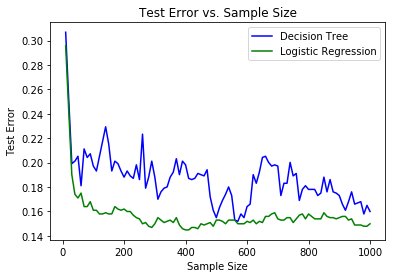

In [34]:
## Generate plot

%matplotlib inline

import matplotlib.pyplot as plt

# Create array with sample sizes
sampleSizes = [i for i in range(10, 1010, 10)]

# Create arrays with indices
decisionTree = [DT_testErrorWithN(a, X_train, X_test) for a in sampleSizes]
logReg = [LR_testErrorWithN(a, X_train, X_test) for a in sampleSizes]

# Create a plot with a caption, X and Y legends, etc
x_label = 'Sample Size'
y_label = 'Test Error'
plt.title('Test Error vs. Sample Size')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.plot(sampleSizes, decisionTree, color='blue', label='Decision Tree') ## (x, y, ...)
plt.plot(sampleSizes, logReg, color='green', label='Logistic Regression')
plt.legend()

plt.show()

### 4.2: Model Complexity vs Generalization Error (10 points)

Vary the max depth of the decision tree from 1 to 15. Plot the resulting error when training a model with all 1000 rows of X_train and y_train. You can adjust the max depth by reinstantiating the DecisionTreeClassifier module with a max_depth parameter:

dt = tree.DecisionTreeClassifier(max_depth=i)

Generate a plot with "Max Depth" as the X-axis and "Test Error" as the Y-axis. Plot the error when predicting labels for X_train as well as X_test for each value of the maximum tree depth. Plot your lines in different colors and include a legend to specify which line belongs to which model class. 

In [35]:
def variedDepthTrain(depth, training_data, predictingFor, target):
    ## train Decision Tree
    ## using given depth
    dt = tree.DecisionTreeClassifier(max_depth=depth)
    dt_train = dt.fit(training_data, y_train, sample_weight=None, check_input=True, X_idx_sorted=None)
    y_hat_dectree = dt_train.predict(predictingFor, check_input=True)
    
    ## compute error
    return error(target, y_hat_dectree)

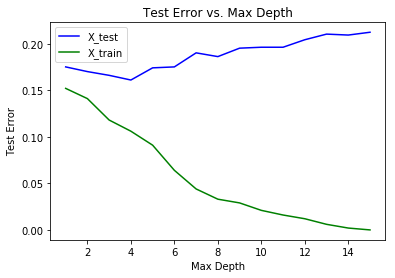

In [36]:
## Generate plot

%matplotlib inline

import matplotlib.pyplot as plt

# Create array with depth sizes
depthSizes = np.array([i for i in range(1, 16)])

# Create arrays with indices
X_Test_Error = np.array([variedDepthTrain(a, X_train, X_test, y_test) for a in depthSizes])
X_Train_Error = np.array([variedDepthTrain(a, X_train, X_train, y_train) for a in depthSizes])

# Create a plot with a caption, X and Y legends, etc
x_label = 'Max Depth'
y_label = 'Test Error'
plt.title('Test Error vs. Max Depth')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.plot(depthSizes, X_Test_Error, color='blue', label='X_test')
plt.plot(depthSizes, X_Train_Error, color='green', label='X_train')
plt.legend()

plt.show()

## Part 5: Observing Error Disparities

In this section, you will explore the disparities in error for different "groups" of the dataset. The error disparity between two test sets with errors $\epsilon_1$ and $\epsilon_2$ is $|\epsilon_1 - \epsilon_2|$. 



### 5.1: Splitting by Feature Values (10 points)

Write a function which takes in X and y arrays, a column number, and a threshold. The function should return arrays X0 and y0 containing all rows where the value in the specified column falls strictly below the threshold, as well as arrays X1 and y1 containing all rows where the the value in the specified column is above or equal to the threshold. 


Numpy supports indexing via an array of values, which allows you to extract a non-contiguous subset of rows from an array. You might find this helpful. More information is available here: https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html

In [37]:
import numpy as np
import pdb

def split_on_feature(X_test, y_test, column, thresh):
    (w, d) = X_test.shape 
    X0_test = []
    y0_test = []
    X1_test = []
    y1_test = []
    
    # for each row, check each column for threshold
    for i in range(0, w, 1):
        if(X_test[i][column] < thresh):
            y0_test.append(y_test[i]) 
            X0_test.append(X_test[i])
        else:
            y1_test.append(y_test[i])
            X1_test.append(X_test[i])
                
    X0_test = np.array(X0_test)
    X1_test = np.array(X1_test)
    y0_test = np.array(y0_test)
    y1_test = np.array(y1_test)
    return (X0_test, X1_test, y0_test, y1_test)

### 5.2: Calculating All Discrepancies (10 points)

Now, let's evaluate the error disparities for the model you previously trained in Section 2.1. If you used the same naming conventions for sections 3 and 4, the models may have been overwritten. If that's the case, make sure to rerun the code in Section 2.1. 

For each feature in the dataset, use the function from 5.1 to split on that column when the threshold is set to 0.5. Then compute the error disparity for the feature by calculating the error of predictions made on both X0 and X1. 

This cell should print out the columns _by name_ (using the list of names in the Pandas dataframe) along with their corresponding error discrepancies, and should print in descending order of error discrepancy. You should omit columns where either of the splits have fewer than 100 rows.

__Before running any code__, look through the available features on the dataset, available at http://archive.ics.uci.edu/ml/datasets/communities+and+crime, and write down two attributes that you would expect to have __high__ error disparity, and two attributes you would expect to have __low__ error disparity.

Two attributes I expect to have high error disparity:
    1. medIncome
    2. PctUnemployed
    
Two attributes I expect to have low error disparity:
    1. LandArea
    2. pctWRetire

In [38]:
(w, d) = X_test.shape
error_disparity = []
labels = []

# split into 2 buckets
for i in range(0, d, 1):
    (X_below, X_above, y_below, y_above) = split_on_feature(X_test, y_test, i, 0.5)

    # find the predictions for each bucket if >= 100 for each column
    if(len(X_below) >= 100 and len(X_above) >= 100):
        y_hat_above = dt_trained.predict(X_above, check_input=True)
        y_hat_below = dt_trained.predict(X_below, check_input=True)
    
        error_above = error(y_above, y_hat_above)
        error_below = error(y_below, y_hat_below)
    
        disparity = abs(error_above - error_below)
        error_disparity.append(disparity)
        labels.append(dataframe.columns[i])

# output
error_disparity,labels = zip(*sorted(zip(error_disparity,labels)))
for j in range((len(labels) - 1), 0, -1):
    print(labels[j], ":", error_disparity[j])

PctHousNoPhone : 0.17142857142857143
pctWInvInc : 0.17085142227693906
TotalPctDiv : 0.1546858791493776
FemalePctDiv : 0.14595161963583014
medIncome : 0.14362085027100271
medFamInc : 0.1386707423486117
MalePctDivorce : 0.13832340284673952
PctHousLess3BR : 0.12922458766728234
blackPerCap : 0.12758227947529652
PctLess9thGrade : 0.1230911816029368
HispPerCap : 0.1208748156342183
PctNotHSGrad : 0.11865372452473169
PctUnemployed : 0.11725469545374761
OtherPerCap : 0.11722402013664149
PctEmploy : 0.11642139186410225
PctHousOccup : 0.1117025518341308
PctPopUnderPov : 0.11121313744277653
MedNumBR : 0.10755058039506066
pctWWage : 0.10671728356005483
PctOccupMgmtProf : 0.10623433367827988
PctPersOwnOccup : 0.1041754943502825
perCapInc : 0.1018821603927987
PctTeen2Par : 0.09447903694479037
whitePerCap : 0.08968261790941796
PersPerOwnOccHous : 0.08676060454750278
agePct12t29 : 0.08662301294170183
PctOccupManu : 0.08642869497535244
RentHighQ : 0.0845178540624461
PersPerRentOccHous : 0.08070495484683

### 5.3: Other Types of Discrepancies (10 points)

Instead of error disparities, let's compute two other types of errors that are of interest to us: False Negative Disparity and False Positive Disparity. 

For the feature racePctblack (percentage of population that is African-American), which is in column 2, compute the False Positive rate and False Negative rate using the provided functions. You should threshold the feature at 0.5 as earlier to create the two sets of samples.

In [39]:
## INPUTS:
# y - true labels
# y_hat - predicted labels
def fp_error(y, y_hat):
    fp_errors = [np.maximum(y_hat[i] - y[i], 0) for i in range(len(y))]
    return np.mean(fp_errors)

## INPUTS:
# y - true labels
# y_hat - predicted labels
def fn_error(y, y_hat):
    fn_errors = [np.maximum(y[i] - y_hat[i], 0) for i in range(len(y))]
    return np.mean(fn_errors)

In [40]:
(X_below, X_above, y_below, y_above) = split_on_feature(X_test, y_test, 2, 0.5)
y_hat_above = dt_trained.predict(X_above, check_input=True)
y_hat_below = dt_trained.predict(X_below, check_input=True)

y1_fperr = fp_error(y_above, y_hat_above)
y0_fperr = fp_error(y_below, y_hat_below)
y1_fnerr = fn_error(y_above, y_hat_above)
y0_fnerr = fn_error(y_below, y_hat_below)

print('False Positive Error Rate of Communities with Above Median Black Population: ', y1_fperr)
print('False Positive Error Rate of Communities with Below Median Black Population: ', y0_fperr)

print('False Negative Error Rate of Communities with Above Median Black Population: ', y1_fnerr)
print('False Negative Error Rate of Communities with Below Median Black Population: ', y0_fnerr)

False Positive Error Rate of Communities with Above Median Black Population:  0.09523809523809523
False Positive Error Rate of Communities with Below Median Black Population:  0.05069124423963134
False Negative Error Rate of Communities with Above Median Black Population:  0.06349206349206349
False Negative Error Rate of Communities with Below Median Black Population:  0.12442396313364056


## Part 6: Short Response Questions (25 pts)

#### Q1: When training a machine learning model with some dataset, what are some assumptions we are making about the data? What are some things that it is important for us not to assume? Please give a few examples for each.

Three assumptions are made about the data:
    1. Examples are drawn i.i.d (independently and identically) at random from the distribution.
            a. Examples in which this is violated: Drawing examples from the same dating site (as in the Gaydar study), or asking only your friends participate in some study. 
    2. The distribution is stationary.
            a. Examples in which this is violated: A data set that tracks retail sales throughout the year (since the data changes seasonally), or a data set which tracks social media trends.
    3. Examples from test and training sets are drawn from partitions from the same distribution.
            a. Examples in which this is violated: The training set is drawn from participants of dating site A, and the test set is drawn from participants of dating site B. Or, the training set is drawn from retail sales in Winter, and the test set is drawn from retail sales in the Fall.
            
It is important for us not to assume that 1, 2, and 3 are met by the data. Assuming the data does follow 1, 2, and 3 when in reality it does not, and we do not account for this in the training of our model, hinders the model's ability to generalize to new data.

#### Q2: Why is it important to evaluate our model on data which was not used in training? What is the error rate on "test" or "holdout" data supposed to be a proxy for?

It is important to evaluate our model on data which was not used in training so that we can measure how well our model generalizes to new data. Evaluating on never-before-seen data is also an indicator of if the model overfit the training set. If we train on test data, we cannot approximate the true performance of the model in the theoretical "real world".

The error rate on the "test" or "holdout" data is a proxy for how well the model generalizes to new data, i.e., "real world" performance.

#### Q3: In your own words, explain the results of your plot from 4.1. Why does it make sense that these results occur?

Plot 4.1 shows that for both decision tree and logistic regression models, performance on test data improves when the size of the training set increases. A larger sample size reduces test error. It makes sence that these results occur because the larger the training set, the more closely the training set represents the "real world". More formally (if our model class if finite), 

        | training error - true error | = sqrt(log(|model class|)/sample size)
        
From the above, our model is best able to approximate to the real world (or in this case, the test set) the larger its sample size in relation to model complexity.

#### Q4: In your own words, explain the results of your plot from 4.2. Why does it make sense that these results occur?

Plot 4.2 shows overfitting of the decision tree model to the training data. It makes sense that these results occur because while the depth of the decision tree increases as the size of the training set stays the same, the decision tree becomes too complex and more closely fits the peculiarities of the training data. As in Q3, 

        | training error - true error | = sqrt(log(|model class|)/sample size)
        
In Plot 4.2, the cardinality of the model class increases as the sample size stays the same. This means the training error and true error (in this case, error on the test set) will become increasingly dissimilar as the model complexity increases in relation to the sample size.

#### Q5: In your own words, explain the results of section 5.3. What are some possible implications of this model in terms of unfairness?

The model more frequently considers majority black populations violent than minority black populations. More specifically, the model more frequently considers majority black populations violent when they are actually nonviolent (false positive error rate) and more frequently considers minority black populations nonviolent when they are actually violent (false negative error rate). The model is more likely to give minority black populations the benefit of the doubt.

This means that either the data set or the trained model (or both) is unfair in terms of equality of error between majority and minority black populations. Some implications of this model in terms of unfairness arise when the model may exacerbate pre-existing bias, since the model does not apply fairness restrictions when making decisions. This is especially agregious when there is the potential of feedback loops. As discussed in "The Frontiers of Fairness in Machine Learning", marking a nonviolent community as violent may make that community appear even more violent if the model's predictions are used to increase policing in that community.

## Part 7: Extra Credit (5-10 points)

Play around with the data and generate some kind of plot (via matplotlib) that you find interesting. Write a few sentences about your process, what you found, and what you think it suggests about the data. This could be an evaluation of multiple model classes, a statistical analysis of different features, unsupervised analysis, extending the investigation into error discrepancies, or anything else you can think of. 

Any well-justified solution will earn up to 5 points of extra credit. The 3 submissions we deem most interesting will earn up to 10 points of extra credit. 

In [34]:
# make new dataset with only features whose importance is > 0
unimportant_labels = []
# rank the importace of features
feature_importance,labels = zip(*sorted(zip(dt_trained.feature_importances_, dataframe.columns.values)))
for j in range(0, len(labels)):
    if(feature_importance[j] != 0.):
        print(labels[j], ":", feature_importance[j])
    else:
        unimportant_labels.append(labels[j])

OwnOccHiQuart : 0.006681658885299701
PctOccupManu : 0.006702719649393237
PctNotHSGrad : 0.008686156550889614
PctTeen2Par : 0.011030040064621733
MalePctDivorce : 0.01130272684306198
PctEmplManu : 0.01244110964320127
PctSpeakEnglOnly : 0.012972540021794708
PctSameCity85 : 0.013873722268782022
HousVacant : 0.015685191382217464
PctHousLess3BR : 0.01667321360729879
PopDens : 0.0180678308103075
racePctWhite : 0.018794556764484768
pctWInvInc : 0.01970307378097533
PctVacMore6Mos : 0.020268623957674065
RentMedian : 0.02412821264136004
FemalePctDiv : 0.03082153307235511
NumImmig : 0.0405954113464241
PctPopUnderPov : 0.05060047516206403
PctIlleg : 0.6609712035477944


In [35]:
modified_dataframe = dataframe.drop(unimportant_labels, axis = 1)

In [36]:
modified_dataframe.head(5)

,racePctWhite,pctWInvInc,PctPopUnderPov,PctNotHSGrad,PctEmplManu,PctOccupManu,MalePctDivorce,FemalePctDiv,PctTeen2Par,PctIlleg,NumImmig,PctSpeakEnglOnly,PctHousLess3BR,HousVacant,PctVacMore6Mos,OwnOccHiQuart,RentMedian,PctSameCity85,PopDens,ViolentCrimesPerPop
0,0.90,0.60,0.19,0.18,0.23,0.25,0.68,0.75,0.56,0.14,0.03,0.89,0.51,0.21,0.26,0.18,0.35,0.51,0.26,0.0
1,0.74,0.45,0.24,0.24,0.57,0.42,1.00,0.91,0.39,0.24,0.01,0.84,0.82,0.02,0.25,0.21,0.38,0.60,0.12,1.0
2,0.56,0.39,0.27,0.43,0.32,0.49,0.63,0.71,0.43,0.46,0.00,0.88,0.51,0.01,0.30,0.16,0.29,0.67,0.21,1.0
3,0.08,0.43,0.10,0.25,0.36,0.37,0.34,0.49,0.65,0.33,0.02,0.81,0.01,0.01,0.47,0.19,0.70,0.64,0.39,0.0
4,0.95,0.68,0.06,0.30,0.67,0.42,0.22,0.20,0.85,0.06,0.00,0.88,0.19,0.01,0.55,0.30,0.36,0.61,0.09,0.0


In [37]:
# convert to numpy array
modified_data = modified_dataframe.values[:, :]

In [38]:
# separate the features and labels
modified_X = modified_dataframe.values[:, :-1]

In [39]:
# create training and test sets
modified_X_train = modified_X[0:1000, :]
modified_X_test = modified_X[1000:, :]

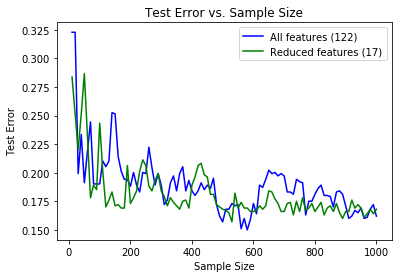

In [91]:
## Generate plot

%matplotlib inline

import matplotlib.pyplot as plt

# Create array with sample sizes
sampleSizes = [i for i in range(10, 1010, 10)]

# Create arrays with indices
decisionTree = [DT_testErrorWithN(a, X_train, X_test) for a in sampleSizes]
decisionTree_error = sum(decisionTree)/len(sampleSizes)
restricted_decisionTree = [DT_testErrorWithN(a, modified_X_train, modified_X_test) for a in sampleSizes]
restricted_decisionTree_error = sum(restricted_decisionTree)/len(sampleSizes)

# Create a plot with a caption, X and Y legends, etc
x_label = 'Sample Size'
y_label = 'Test Error'
plt.title('Test Error vs. Sample Size')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.plot(sampleSizes, decisionTree, color='blue', label='All features (122)') 
plt.plot(sampleSizes, restricted_decisionTree, color='green', label='Reduced features (17)')
plt.legend()

plt.show()

In [92]:
decisionTree_error

0.18931589537223348

In [93]:
restricted_decisionTree_error

0.18138832997987925

### Write a few sentences about your process, what you found, and what you think it suggests about the data.

1. My process: I found the 17 most important features in the dataset. I first used the feature_importances_ attribute on a decision tree trained with all 122 features to find the importance of each feature. This resulted in 17 features with nonzero importance scores. I created a new dataset by removing all features whose importance scores were equal to 0. I then set up the data for training and testing as in Part 1 (noting that y values need not be changed, since only columns of features were removed from the original dataset). Then I trained and tested a new decision tree as in Part 2 with the modified datasets. I then created the plot above, similar to plot 4.1.



2. What I found: A decision tree trained and tested on the 17 most relevant features outperforms a decision tree trained and tested on all 122 features across n sample sizes (p = .014613).



3. What I think it suggests about the data: The vast majority of the features do not improve the model's performance on the test data. In fact, this vast majority hinders performance by causing the model to overfit on the training set. The feature set can be reduced to improve the model's ability to generalize.